In [2]:
######## For Hackintosh with ryzen processor ####
!export MKL_DEBUG_CPU_TYPE=5
#################################################
from cv2_plt_imshow import cv2_plt_imshow
import face_recognition
import cv2 

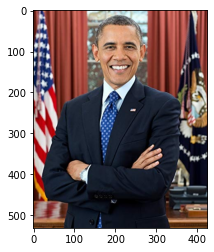

In [10]:
images = cv2.imread('extra/obama.jpg')
cv2_plt_imshow(images)       

In [11]:
img = face_recognition.load_image_file('extra/obama.jpg')

In [12]:
loc = face_recognition.face_locations(img)

In [13]:
loc #[(56, 259, 163, 151)]

[(56, 259, 163, 151)]

In [17]:
cv2.rectangle(images,(151, 56), (259, 163), (0, 255, 0), 2)
cv2.putText(images, 'Obama', (151, 66), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255, 255, 255), 2)


array([[[ 25,  29,  87],
        [ 20,  25,  80],
        [ 16,  23,  78],
        ...,
        [ 48,  54, 137],
        [ 63,  67, 156],
        [ 84,  87, 185]],

       [[ 25,  29,  87],
        [ 20,  24,  82],
        [ 16,  23,  78],
        ...,
        [ 48,  54, 137],
        [ 64,  68, 157],
        [ 83,  86, 184]],

       [[ 25,  29,  87],
        [ 20,  24,  82],
        [ 16,  23,  78],
        ...,
        [ 49,  55, 138],
        [ 64,  68, 157],
        [ 83,  86, 184]],

       ...,

       [[ 24,  65, 110],
        [ 22,  64, 109],
        [ 22,  63, 108],
        ...,
        [ 40,  72, 113],
        [ 41,  73, 114],
        [  0, 255,   0]],

       [[ 39,  85, 133],
        [ 38,  84, 132],
        [ 37,  83, 131],
        ...,
        [ 30,  65, 108],
        [ 30,  65, 108],
        [  0, 255,   0]],

       [[ 34,  79, 130],
        [ 33,  78, 129],
        [ 32,  77, 128],
        ...,
        [ 23,  58, 101],
        [ 23,  58, 101],
        [  0, 255,   0]]

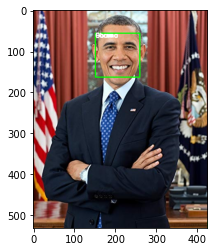

In [18]:
cv2_plt_imshow(images)

In [61]:
features = face_recognition.face_landmarks(img)

In [63]:
features

[{'chin': [(158, 96),
   (158, 109),
   (159, 124),
   (162, 138),
   (167, 151),
   (175, 163),
   (185, 173),
   (196, 180),
   (210, 182),
   (224, 179),
   (235, 171),
   (244, 160),
   (252, 148),
   (256, 136),
   (258, 122),
   (259, 108),
   (258, 96)],
  'left_eyebrow': [(169, 88), (175, 81), (184, 78), (194, 78), (203, 81)],
  'right_eyebrow': [(219, 80), (227, 77), (237, 77), (246, 81), (251, 88)],
  'nose_bridge': [(211, 89), (211, 98), (211, 107), (212, 116)],
  'nose_tip': [(198, 121), (204, 123), (211, 124), (218, 122), (224, 120)],
  'left_eye': [(180, 92),
   (185, 90),
   (191, 89),
   (197, 92),
   (191, 93),
   (185, 93)],
  'right_eye': [(224, 92),
   (230, 89),
   (236, 89),
   (241, 92),
   (236, 92),
   (230, 92)],
  'top_lip': [(184, 137),
   (193, 133),
   (203, 132),
   (211, 133),
   (218, 132),
   (227, 132),
   (235, 135),
   (233, 136),
   (218, 135),
   (211, 136),
   (203, 136),
   (187, 138)],
  'bottom_lip': [(235, 135),
   (228, 146),
   (218, 152),


In [68]:
known = face_recognition.load_image_file('extra/obama.jpg')
unknown = face_recognition.load_image_file('extra/test.jpg')

known_en = face_recognition.face_encodings(known)[0]
unknown_en = face_recognition.face_encodings(unknown)[0]


In [69]:
known_en

array([-0.0903146 ,  0.1134347 ,  0.01520124, -0.06156214,  0.01184766,
       -0.01890466, -0.09516429, -0.09459024,  0.17703687, -0.09853763,
        0.24244073,  0.08992425, -0.20137954, -0.15258317,  0.0625596 ,
        0.11279745, -0.18016323, -0.07486858, -0.09140033, -0.10853536,
        0.02553715, -0.00443967,  0.10687138,  0.04752121, -0.13527173,
       -0.33906144, -0.06891786, -0.18256877,  0.00329921, -0.09445037,
       -0.08571453,  0.01124156, -0.16814035, -0.11136269,  0.02902179,
       -0.01586218,  0.0095582 ,  0.01551483,  0.21460116,  0.04238912,
       -0.11992501,  0.08035424,  0.01348504,  0.22222456,  0.29885975,
        0.08212329, -0.0033858 , -0.08976884,  0.11677164, -0.22520633,
        0.08192599,  0.15898822,  0.08030812,  0.03440456,  0.08916075,
       -0.18719757,  0.00142435,  0.09371557, -0.1539267 ,  0.01373757,
        0.00567021, -0.07603173, -0.05081835,  0.05125201,  0.20085502,
        0.12224814, -0.1221867 , -0.0551142 ,  0.13868108, -0.03

In [71]:
results = face_recognition.compare_faces([known_en], unknown_en)

In [73]:
# if obama in unknown image
results

[True]

In [75]:
# if obama not in unknown image

unknown_2 = face_recognition.load_image_file('extra/test2.jpg')
unknown_2_en = face_recognition.face_encodings(unknown_2)[0]

results = face_recognition.compare_faces([known_en], unknown_2_en)
results

[False]

In [79]:
distance = face_recognition.face_distance([known_en], unknown_en)

distance

array([0.47796755])

In [78]:
distance_2 = face_recognition.face_distance([known_en], unknown_2_en)
distance_2

array([0.8989275])